In [22]:
import os
import json
import glob
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [23]:
def get_summary(group):
    summary = pd.DataFrame()
    samples = glob.glob(f"data/fastqc_results/{group}/unzipped/*")

    for sample in samples:
        with open(sample +"/summary.txt") as f:
            df = pd.read_csv(f, sep='\t', lineterminator='\n',header=None)

        filename = df[2].iloc[0]
        df.columns = [filename,'Sample','']
        df.index = df['Sample']
        df = df[filename].to_frame().transpose()

        summary = pd.concat([summary,df])
    return summary

In [24]:
esbl_summary = get_summary('esbl')
ctrl_summary = get_summary('ctrl')

In [25]:
esbl_summary.head()

Sample,Basic Statistics,Per base sequence quality,Per sequence quality scores,Per base sequence content,Per sequence GC content,Per base N content,Sequence Length Distribution,Sequence Duplication Levels,Overrepresented sequences,Adapter Content,Kmer Content
DRR242147_2.fastq.gz,PASS,FAIL,PASS,FAIL,WARN,PASS,WARN,PASS,WARN,PASS,WARN
DRR242154_1.fastq.gz,PASS,PASS,PASS,FAIL,FAIL,PASS,WARN,PASS,PASS,PASS,WARN
DRR242157_2.fastq.gz,PASS,FAIL,PASS,FAIL,FAIL,PASS,WARN,PASS,PASS,PASS,WARN
DRR242158_2.fastq.gz,PASS,FAIL,PASS,FAIL,FAIL,PASS,WARN,PASS,PASS,PASS,FAIL
DRR242167_2.fastq.gz,PASS,FAIL,PASS,FAIL,WARN,PASS,WARN,PASS,WARN,PASS,WARN


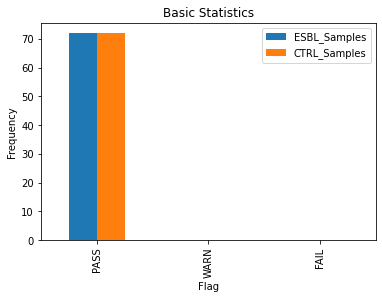

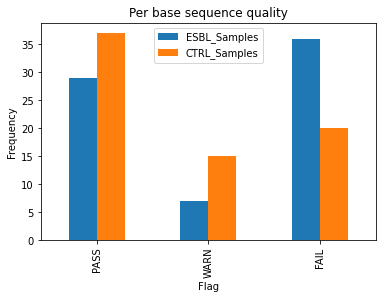

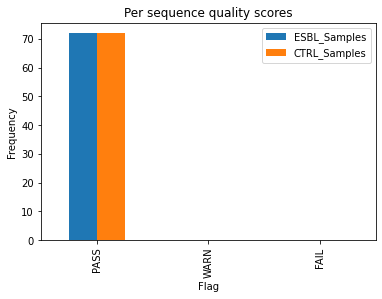

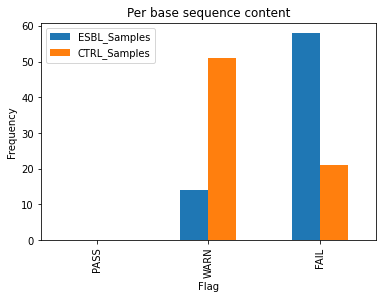

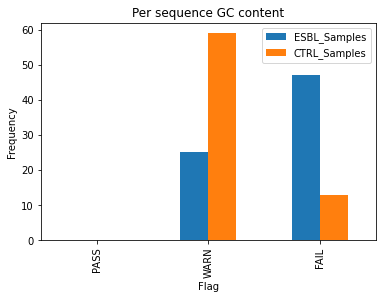

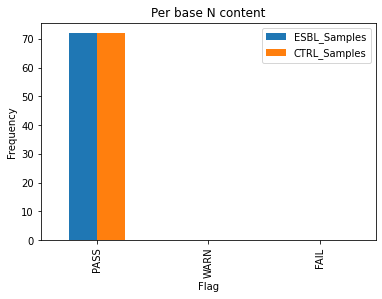

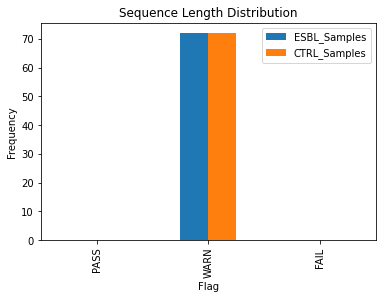

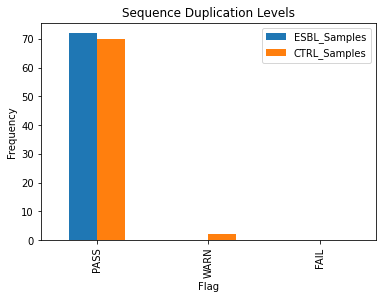

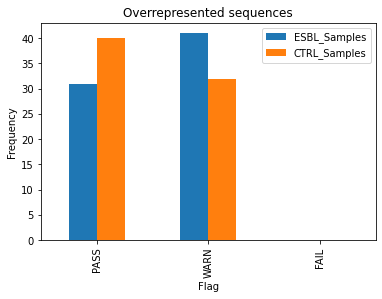

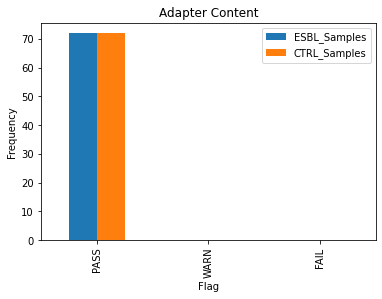

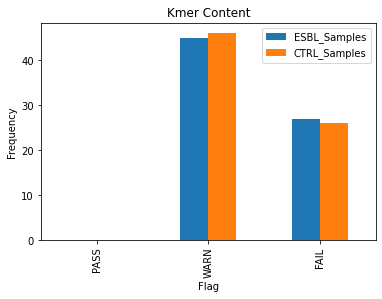

In [32]:
for col in esbl_summary.columns:
    plotdata = pd.DataFrame({
    "ESBL_Samples":esbl_summary[col].value_counts(),
    "CTRL_Samples":ctrl_summary[col].value_counts()},
    index = ['PASS','WARN','FAIL']
    )
    plotdata.plot(kind="bar")
    plt.title(col)
    plt.ylabel("Frequency")
    plt.xlabel("Flag")
    
plt.show()